dataset from https://github.com/icsdataset/hai/tree/master/hai-21.03

The objective is to detect anomalies in the intrusion detection system (IDSs) in industrial facilities. In this exercise, the autoencoder learns to identify normal data coming from the SCADA automation system and is then tested on information containing hacker attacks acquired during the operation of those industrial facilities.

**THIS CODE WAS WRITTEN BY EDSON CASIMIRO**

In [ ]:
#IMPORT LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.metrics import Accuracy
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras import layers, losses


In [ ]:
import gzip
import shutil
with gzip.open('/content/drive/MyDrive/train1.csv.gz', 'rb') as f_in:
    with open('/content/drive/MyDrive/file.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open('/content/drive/MyDrive/test1.csv.gz', 'rb') as f_in:
    with open('/content/drive/MyDrive/testFile.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
dataframe =  pd.read_csv('/content/drive/MyDrive/file.txt')
raw_data = dataframe.values
dataframe.head()
#test
testFrame =  pd.read_csv('/content/drive/MyDrive/testFile.txt')
test_raw_data = testFrame.values
testFrame.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,P1_FCV02D,P1_FCV02Z,P1_FCV03D,P1_FCV03Z,P1_FT01,P1_FT01Z,P1_FT02,P1_FT02Z,P1_FT03,P1_FT03Z,P1_LCV01D,P1_LCV01Z,P1_LIT01,P1_PCV01D,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,P1_PIT01,P1_PIT02,P1_PP01AD,P1_PP01AR,P1_PP01BD,P1_PP01BR,P1_PP02D,P1_PP02R,P1_STSP,P1_TIT01,P1_TIT02,P2_24Vdc,...,P2_HILout,P2_MSD,P2_ManualGO,P2_OnOff,P2_RTR,P2_SIT01,P2_SIT02,P2_TripEx,P2_VT01,P2_VTR01,P2_VTR02,P2_VTR03,P2_VTR04,P2_VXT02,P2_VXT03,P2_VYT02,P2_VYT03,P3_FIT01,P3_LCP01D,P3_LCV01D,P3_LH,P3_LIT01,P3_LL,P3_PIT01,P4_HT_FD,P4_HT_LD,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2020-07-07 15:00:00,0.10178,1.58771,403.78854,985.37353,32.59527,100.0,2839.58520,36.81010,100.0,99.91608,0.0,-1.86768,50.90726,51.95007,176.08643,845.69550,1978.72156,2843.37549,243.38802,989.14117,10.89290,10.8429,402.70947,40.74125,41.32233,12.0,12.26196,1.34293,0.27557,540833,540833,0,0,1,1,1,34.88770,35.1471,28.03162,...,725.21362,763.19324,0,1,2880,790.0,789.76508,1,11.91040,10,10,10,10,-2.8687,-1.0189,3.7751,5.6330,-25.0,688,15888,70,18082.0,20,-23.0,0.00029,76.80121,73.58581,0,464.06610,0.00470,20469.0,386.26666,380.31683,0,10044.0,27567.0,0,0,0,0
1,2020-07-07 15:00:01,0.10178,1.58725,403.78854,985.37353,32.59527,100.0,2843.37549,36.80895,100.0,99.91608,0.0,-1.86768,50.74607,51.96533,173.79756,840.47705,1986.92322,2845.06006,243.00656,992.62018,10.80512,10.8429,402.81174,40.86124,41.32233,12.0,12.26196,1.34216,0.27710,540833,540833,0,0,1,1,1,34.88770,35.1471,28.02301,...,721.74072,763.19324,0,1,2880,789.0,789.13147,1,11.98856,10,10,10,10,-2.9842,-1.2637,3.1689,5.4158,-25.0,648,15952,70,18043.0,20,-23.0,0.00051,76.92419,73.89325,0,464.22888,0.00210,20489.0,386.30286,380.02747,0,10040.0,27564.0,0,0,0,0
2,2020-07-07 15:00:02,0.10178,1.59519,403.78854,985.37353,32.59527,100.0,2845.06006,36.82879,100.0,99.91608,0.0,-1.86768,50.66229,51.96533,174.56052,835.25842,1978.72156,2837.33911,242.81586,993.92468,10.80029,10.8429,402.76062,41.02906,41.32233,12.0,12.26196,1.34369,0.27710,540833,540833,0,0,1,1,1,34.88770,35.1471,28.02993,...,718.15796,763.19324,0,1,2880,786.0,785.81653,1,11.97400,10,10,10,10,-3.4939,-1.5398,2.9615,5.5532,-25.0,616,16000,70,18024.0,20,-23.0,0.00022,77.04715,74.20068,0,466.90533,0.00130,20604.0,389.73883,381.52850,0,10037.0,27565.0,0,0,0,0
3,2020-07-07 15:00:03,0.10178,1.59747,403.78854,985.37353,32.59527,100.0,2837.33911,36.83451,100.0,99.91608,0.0,-1.86768,50.66462,51.98822,176.65860,836.99799,1977.76782,2843.37549,242.43439,993.05493,10.80579,10.8429,402.81174,41.15958,41.32233,12.0,12.26196,1.34445,0.27557,540833,540833,0,0,1,1,1,34.88770,35.1471,28.02993,...,716.38794,763.19324,0,1,2880,785.0,785.42438,1,11.92999,10,10,10,10,-3.8188,-1.6212,3.1285,5.7833,-25.0,584,16064,70,17985.0,20,-23.0,0.00022,77.17014,74.43579,0,466.79688,0.00000,20633.0,388.94311,382.08911,0,10040.0,27560.0,0,0,0,0
4,2020-07-07 15:00:04,0.10178,1.59869,403.78854,985.37353,32.59527,100.0,2843.37549,36.83756,100.0,99.90845,0.0,-1.86768,50.65214,51.90429,175.89565,841.78162,1972.42725,2837.33911,242.81586,992.62018,10.81415,10.8429,402.91394,41.28887,41.21552,12.0,12.26196,1.34293,0.27710,540833,540833,0,0,1,1,1,34.90295,35.1471,28.02990,...,714.66675,763.19324,0,1,2880,783.0,782.99249,1,11.86934,10,10,10,10,-3.9858,-1.5631,3.4986,6.0309,-25.0,552,16112,70,17954.0,20,-23.0,0.00000,77.29312,74.74322,0,467.88190,-0.00043,20738.0,389.72082,383.44543,0,10042.0,27564.0,0,0,0,0


In [ ]:
test_attack = testFrame[testFrame['attack']== 1]
test_normal = testFrame[testFrame['attack']== 0] #.sample(2500)

In [ ]:
test_attack = test_attack.values
test_attack

array([['2020-07-07 15:35:11', 0.10178, 1.47693, ..., 1, 0, 0],
       ['2020-07-07 15:35:12', 0.10178, 1.4809, ..., 1, 0, 0],
       ['2020-07-07 15:35:13', 0.10178, 1.48212, ..., 1, 0, 0],
       ...,
       ['2020-07-07 21:04:47', 0.10177, 1.32876, ..., 0, 1, 0],
       ['2020-07-07 21:04:48', 0.10177, 1.3428, ..., 0, 1, 0],
       ['2020-07-07 21:04:49', 0.10177, 1.34615, ..., 0, 1, 0]],
      dtype=object)

In [ ]:
train_data = raw_data[:,1:-4] #without the time
train_data

array([[0.10121, 1.29784, 397.63785, ..., 0, 10052.0, 27610.0],
       [0.10121, 1.29692, 397.63785, ..., 0, 10052.0, 27610.0],
       [0.10121, 1.29631, 397.63785, ..., 0, 10050.0, 27617.0],
       ...,
       [0.09879, 1.37415, 381.97888, ..., 0, 10053.0, 27627.0],
       [0.09879, 1.37567, 381.97888, ..., 0, 10051.0, 27627.0],
       [0.09879, 1.37949, 381.97888, ..., 0, 10053.0, 27627.0]],
      dtype=object)

In [ ]:
#test data
test_data = test_raw_data[:,1:-4] #without the time
test_data

array([[0.10178, 1.58771, 403.78854, ..., 0, 10044.0, 27567.0],
       [0.10178, 1.58725, 403.78854, ..., 0, 10040.0, 27564.0],
       [0.10178, 1.59519, 403.78854, ..., 0, 10037.0, 27565.0],
       ...,
       [0.10109, 1.61815, 395.43826, ..., 50, 10052.0, 27599.0],
       [0.10109, 1.62609, 395.43826, ..., 50, 10053.0, 27603.0],
       [0.10109, 1.63081, 395.43826, ..., 50, 10053.0, 27595.0]],
      dtype=object)

In [ ]:
test_attack = test_attack[:,1:-4] #without the time
test_attack

array([[0.10178, 1.47693, 403.78854, ..., 0, 10076.0, 27627.0],
       [0.10178, 1.4809, 403.78854, ..., 0, 10053.0, 27627.0],
       [0.10178, 1.48212, 403.78854, ..., 0, 10053.0, 27627.0],
       ...,
       [0.10177, 1.32876, 394.21475, ..., 0, 10053.0, 27605.0],
       [0.10177, 1.3428, 394.21475, ..., 0, 10053.0, 27600.0],
       [0.10177, 1.34615, 394.21475, ..., 0, 10053.0, 27603.0]],
      dtype=object)

In [ ]:
labels = dataframe['attack']
# labels = raw_data[:,-4]
labels

0         0
1         0
2         0
3         0
4         0
         ..
215996    0
215997    0
215998    0
215999    0
216000    0
Name: attack, Length: 216001, dtype: int64

In [ ]:
test_labels = testFrame['attack']
test_labels

0        0
1        0
2        0
3        0
4        0
        ..
43196    0
43197    0
43198    0
43199    0
43200    0
Name: attack, Length: 43201, dtype: int64

Normalizing the data to be between 0 and 1

In [ ]:
train_data_normalized = MinMaxScaler().fit_transform(train_data)
#test
test_data_normalized = MinMaxScaler().fit_transform(test_data)
#test anomalous data
test_attack_normalized = MinMaxScaler().fit_transform(test_attack)

In [ ]:
# train_data_normalized
# len(train_data_normalized[0])
test_attack_normalized

array([[1.        , 0.60492103, 0.77219816, ..., 0.        , 0.51532567,
        1.        ],
       [1.        , 0.61211945, 0.77219816, ..., 0.        , 0.47126437,
        1.        ],
       [1.        , 0.61433156, 0.77219816, ..., 0.        , 0.47126437,
        1.        ],
       ...,
       [0.99224806, 0.33625864, 0.        , ..., 0.        , 0.47126437,
        0.29032258],
       [0.99224806, 0.36171602, 0.        , ..., 0.        , 0.47126437,
        0.12903226],
       [0.99224806, 0.36779025, 0.        , ..., 0.        , 0.47126437,
        0.22580645]])

<function matplotlib.pyplot.show>

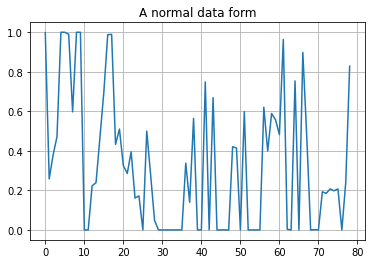

In [ ]:
plt.grid()
plt.plot(np.arange(79), train_data_normalized[35])
plt.title("A normal data form")
plt.show

<function matplotlib.pyplot.show>

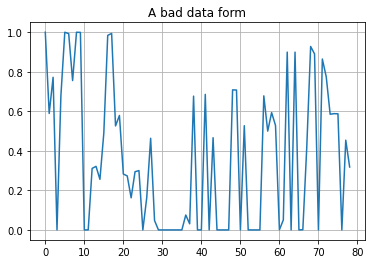

In [ ]:
plt.grid()
# test_data_normalized[2234]
# test_attack[24]
plt.plot(np.arange(79), test_data_normalized[0])
plt.title("A bad data form")
plt.show

In [ ]:
#The autoencoder
class Anomaly(Model):
  def __init__(self):
    super(Anomaly, self).__init__()
    self.encoder = Sequential([
                               Dense(32, activation='relu'),
                               Dense(16, activation='relu'),
                               Dense(8, activation='relu')
    ])

    self.decoder = Sequential([
                               Dense(8, activation='relu'),
                               Dense(16, activation='relu'),
                               Dense(32, activation='relu'),
                               Dense(79, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder= Anomaly()

In [ ]:
autoencoder.compile(optimizer='adam',
loss='mae')
#,metrics=['accuracy']

In [ ]:
#training the model
history = autoencoder.fit(train_data_normalized, train_data_normalized,
                    epochs=20,validation_data=(test_data_normalized, test_data_normalized),
                    shuffle=True)

Epoch 1/20
6751/6751 [==============================] - 19s 3ms/step - loss: 0.0604 - val_loss: 0.1118
Epoch 2/20
6751/6751 [==============================] - 29s 4ms/step - loss: 0.0449 - val_loss: 0.1089
Epoch 3/20
6751/6751 [==============================] - 22s 3ms/step - loss: 0.0406 - val_loss: 0.1044
Epoch 4/20
6751/6751 [==============================] - 16s 2ms/step - loss: 0.0375 - val_loss: 0.1026
Epoch 5/20
6751/6751 [==============================] - 15s 2ms/step - loss: 0.0363 - val_loss: 0.1056
Epoch 6/20
6751/6751 [==============================] - 16s 2ms/step - loss: 0.0356 - val_loss: 0.1043
Epoch 7/20
6751/6751 [==============================] - 15s 2ms/step - loss: 0.0351 - val_loss: 0.1044
Epoch 8/20
6751/6751 [==============================] - 15s 2ms/step - loss: 0.0348 - val_loss: 0.1021
Epoch 9/20
6751/6751 [==============================] - 16s 2ms/step - loss: 0.0346 - val_loss: 0.1026
Epoch 10/20
6751/6751 [==============================] - 16s 2ms/step - l

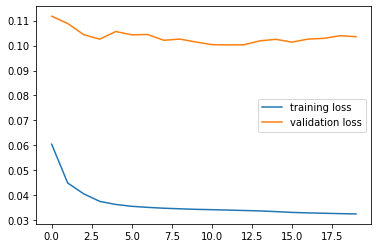

In [ ]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()


Here, as we see, there is a big difference between normal and compromised data. Or detecting anomalies is exactly what we are looking for.


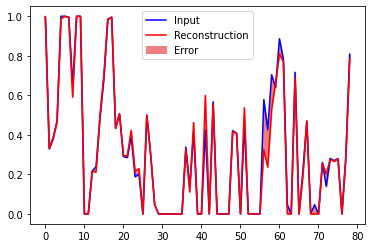

In [ ]:
train_data_normalized = np.asarray(train_data_normalized).astype('float32')
# test_attack = np.array(test_attack) 
encoded_img = autoencoder.encoder(train_data_normalized)
decoded_img = autoencoder.decoder(encoded_img)

plt.plot(train_data_normalized[0], 'b')
plt.plot(decoded_img[0], 'r')
plt.fill_between(np.arange(79),decoded_img[0], train_data_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()
# test_attack[0]

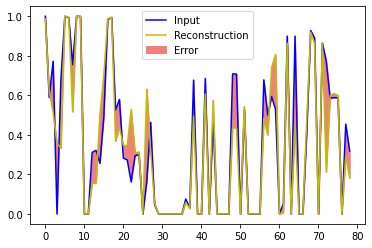

In [ ]:
#for anomalous data, let see if the error is higher
# test_data_normalized = np.asarray(test_data_normalized).astype('float32')
# test_attack = np.array(test_attack)
# trying test_data_normalized instead of test_attack
test_attack = np.asarray(test_data_normalized).astype('float32')
encoded_attack_img = autoencoder.encoder(test_attack)
decoded_attack_img = autoencoder.decoder(encoded_attack_img)

plt.plot(test_attack[0], 'b')
plt.plot(decoded_attack_img[0], 'y')
plt.fill_between(np.arange(79),decoded_attack_img[0], test_data_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


As we can see at the graph, our model tries to recostruct the anomalous data but with a very high error rate

In [ ]:
reconstructions = autoencoder.predict(train_data_normalized)
train_loss = tf.keras.losses.mae(reconstructions, train_data_normalized)

standard deviation

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.043798376


In [ ]:
def predict(model, data, threashold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threashold)

def print_states(prediction, labels):
  print("Accuracy = {}".format(accuracy_score(labels, prediction)))

In [ ]:
preds = predict(autoencoder, test_data_normalized, threshold)
print_states(preds, test_labels)

Accuracy = 0.9854401518483369
